In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



In [33]:
dataset=pd.read_csv("Parkinson's_Disease_Detection.csv")


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [35]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [36]:
# checking the null values
dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [37]:
dataset['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

array([[<AxesSubplot:title={'center':'MDVP:Fo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Fhi(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Flo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(%)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(Abs)'}>],
       [<AxesSubplot:title={'center':'MDVP:RAP'}>,
        <AxesSubplot:title={'center':'MDVP:PPQ'}>,
        <AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer(dB)'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ3'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ5'}>,
        <AxesSubplot:title={'center':'MDVP:APQ'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'DFA'}>,

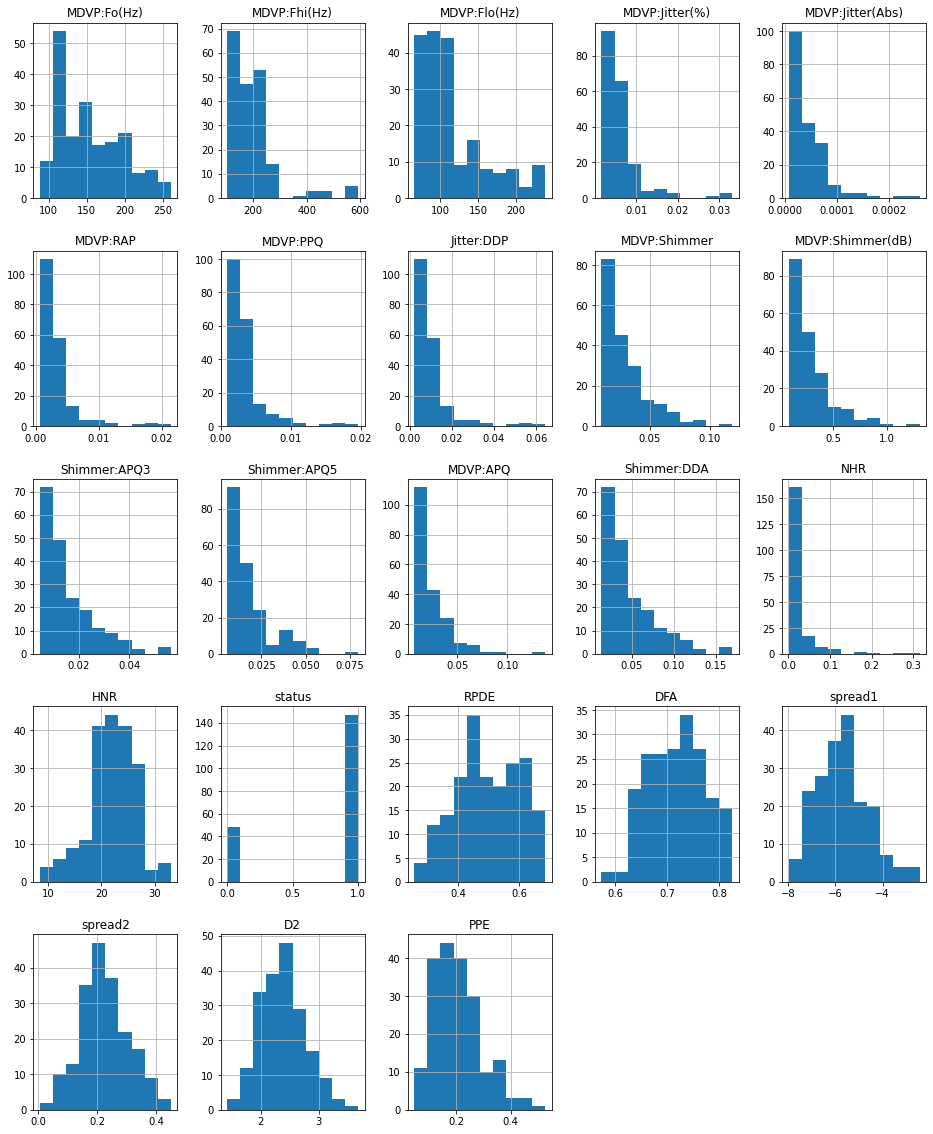

In [38]:
import matplotlib.pyplot as plt
dataset.hist(figsize = (16,20))

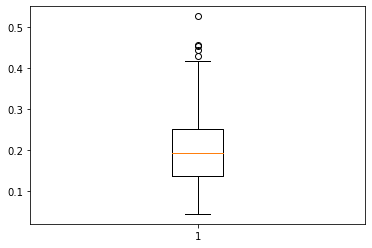

In [39]:
plt.boxplot(dataset["PPE"])
plt.show()

In [40]:
print(dataset['PPE'].quantile(0.10))
print(dataset['PPE'].quantile(0.90))

0.101992
0.3340782


In [41]:
print(dataset['PPE'].skew())
dataset['PPE'] = np.where(dataset['PPE']< 0.1 ,0.1,dataset['PPE'])
dataset['PPE'] = np.where(dataset['PPE']> 0.3 ,0.3,dataset['PPE'])
print(dataset['PPE'].skew())

0.7974910716463577
0.08358986524042777


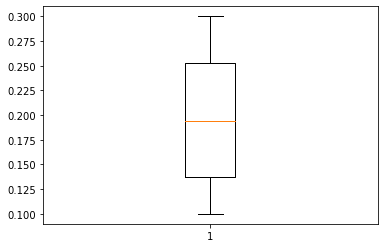

In [42]:
plt.boxplot(dataset["PPE"])
plt.show()

In [43]:
# dividing data into features and labels
features = dataset.drop(columns=['name','status'], axis=1)
labels= dataset['status']

In [44]:
#Normalizing data using min max scaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [45]:
# spiliting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
model1 =SVC()
model1.fit(x_train,y_train)


SVC()

In [47]:
print('Accuracy of train data :',model1.score(x_train,y_train)*100,'%')

Accuracy of train data : 89.1025641025641 %


In [48]:
print('Accuracy of test data :',model1.score(x_test,y_test)*100,'%')

Accuracy of test data : 92.3076923076923 %


In [49]:
model2=KNeighborsClassifier(n_neighbors=5)

In [50]:
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
print('Accuracy of train data :',model2.score(x_train,y_train)*100,'%')

Accuracy of train data : 96.7948717948718 %


In [52]:
print('Accuracy of test data :',model2.score(x_test,y_test)*100,'%')

Accuracy of test data : 94.87179487179486 %


In [53]:
model3=LogisticRegression()

In [54]:
model3.fit(x_train,y_train)

LogisticRegression()

In [55]:
print('Accuracy of train data :',model3.score(x_train,y_train)*100,'%')

Accuracy of train data : 86.53846153846155 %


In [56]:
print('Accuracy of test data :',model3.score(x_test,y_test)*100,'%')

Accuracy of test data : 84.61538461538461 %
